In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
df=pd.read_csv('Data.csv',";")
df

C:\Users\heyro\AppData\Local\Temp\ipykernel_7024\3689649195.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv('Data.csv',";")
C:\Users\heyro\AppData\Local\Temp\ipykernel_7024\3689649195.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data.csv',";")


,fBillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


In [111]:
df["Country"].value_counts()

United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

In [112]:
df.dtypes

fBillNo        object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

In [113]:
df['Price']=df['Price'].str.replace(",",".")
df['Price']=df['Price'].astype("float64")

In [114]:
df.tail(5)

,fBillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,4.15,12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,09.12.2011 12:50,4.95,12680.0,France


In [115]:
#understanding/findin out each customers rec , freq and monetary values



#recenccy

day="2012-01-01"
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df["Date"])



recency=df.groupby(["CustomerID"]).agg({"Date":lambda x:((day-x.max()).days)})


In [116]:
recency.head(10)

,Date
CustomerID,
12346.0,347
12347.0,61
12349.0,40
12350.0,332
12352.0,94
12353.0,226
12354.0,254
12355.0,117
12356.0,44


In [117]:
#frequency


freq=df.drop_duplicates(subset="fBillNo").groupby(["CustomerID"])[["fBillNo"]].count()
freq.head(5)

,fBillNo
CustomerID,
12346.0,1
12347.0,7
12349.0,1
12350.0,1
12352.0,8


In [118]:
#monetary



df["total"]=df["Quantity"]*df["Price"]

In [119]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55
12350.0,334.40
12352.0,2506.04
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [121]:
RFM=pd.concat([recency,freq,money], axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,61,7,4310.00
12349.0,40,1,1757.55
12350.0,332,1,334.40
12352.0,94,8,2506.04
...,...,...,...
18280.0,181,1,180.60
18281.0,25,1,80.82
18282.0,237,2,178.05


In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)


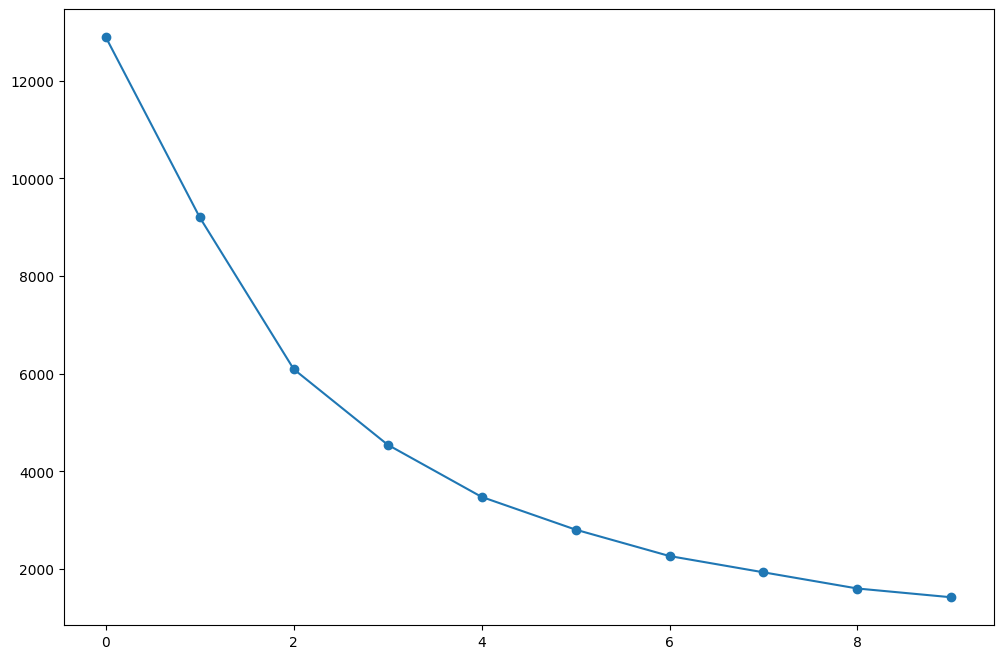

In [124]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")





In [125]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [126]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,1,77183.60,1
12347.0,61,7,4310.00,3
12349.0,40,1,1757.55,3
12350.0,332,1,334.40,2
12352.0,94,8,2506.04,3
...,...,...,...,...
18280.0,181,1,180.60,2
18281.0,25,1,80.82,3
18282.0,237,2,178.05,2


In [127]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

C:\Users\heyro\AppData\Local\Temp\ipykernel_7024\4293404447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,48.760000,58.960000,81979.682000
2,281.745299,1.545299,495.484189
3,68.634429,4.797872,1913.384218


In [132]:
def func(row):
    if row["Clusters"]==1:
        return 'Whales'
    elif row["Clusters"]==2:
        return 'Lapsed Cx'
    else:
        return 'Avg. Cx'

In [133]:
RFM['group']=RFM.apply(func, axis=1)

In [134]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,1,77183.60,1,Whales
12347.0,61,7,4310.00,3,Avg. Cx
12349.0,40,1,1757.55,3,Avg. Cx
12350.0,332,1,334.40,2,Lapsed Cx
12352.0,94,8,2506.04,3,Avg. Cx
...,...,...,...,...,...
18280.0,181,1,180.60,2,Lapsed Cx
18281.0,25,1,80.82,3,Avg. Cx
18282.0,237,2,178.05,2,Lapsed Cx


In [135]:
result=RFM.group.value_counts()

In [136]:
result

Avg. Cx      3102
Lapsed Cx    1170
Whales         25
Name: group, dtype: int64

<AxesSubplot: >

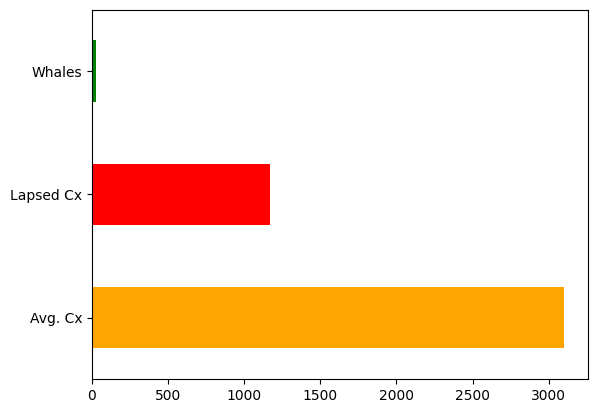

In [138]:
result.plot(kind="barh", color=["Orange","Red","Green"])